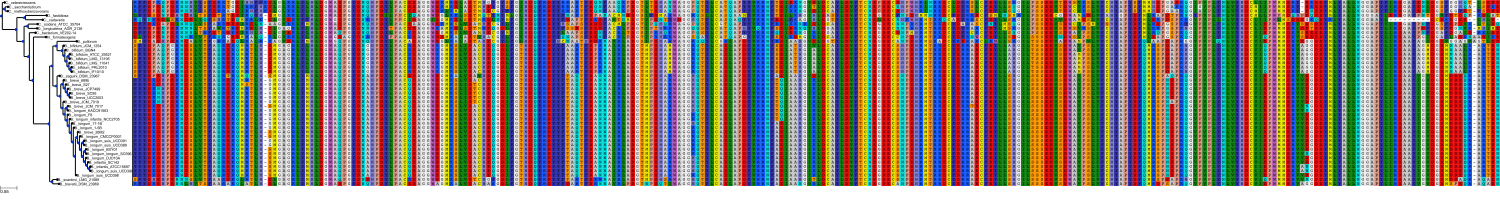

In [35]:
import ete2 
algnfile = 'Domain.aln'
treefile = 'Blon_1479.nwk'

t = ete2.PhyloTree(newick=treefile, alignment=algnfile, alg_format="fasta")

t.render('%%inline', w=1500)
#t.render('Fig1.pdf', w=1500)

In [28]:
t = ete2.PhyloTree(treefile)

tree_list = []
for leaf in t.iter_leaf_names():
    tree_list.append(leaf)

algn_list = []
for line in open(algnfile):
    if line[0] == '>':
        algn_list.append(line[1:len(line)-1])

for result in set(tree_list) - set(algn_list):
    print(result,tree_list.index(result))

('C._scidens_ATCC_35704', 5)


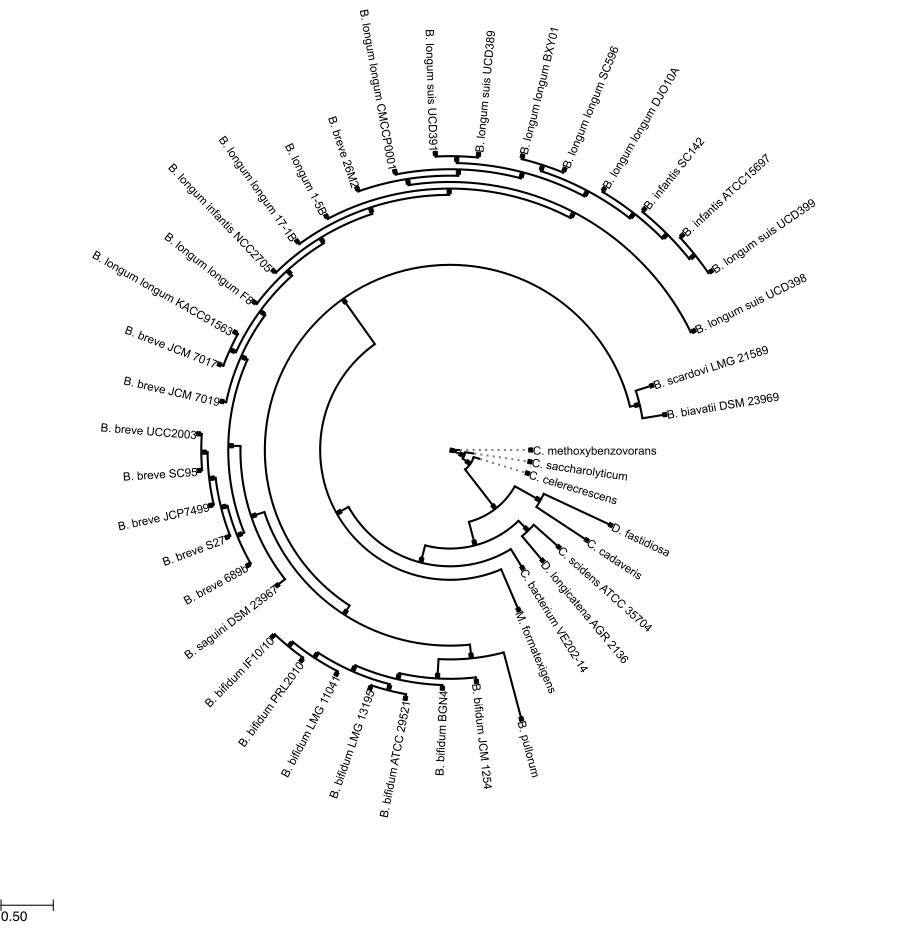

In [11]:
import ete2 
treefile = 'Blon_1479.nwk'

t = ete2.PhyloTree(newick=treefile)
t.set_outgroup('C. methoxybenzovorans')
#t.set_outgroup('B. longum longum KACC91563')

style = ete2.NodeStyle()
style["vt_line_width"] = 2
style["hz_line_width"] = 2

for leaf in t.traverse():
    leaf.img_style = style

ts = ete2.TreeStyle()
ts.show_leaf_name = False
ts.scale = 100


ts.mode = 'c'

t.render('%%inline', w=900, tree_style=ts)
#t.render('Blong_1479_tree.png', w=900, tree_style=ts)

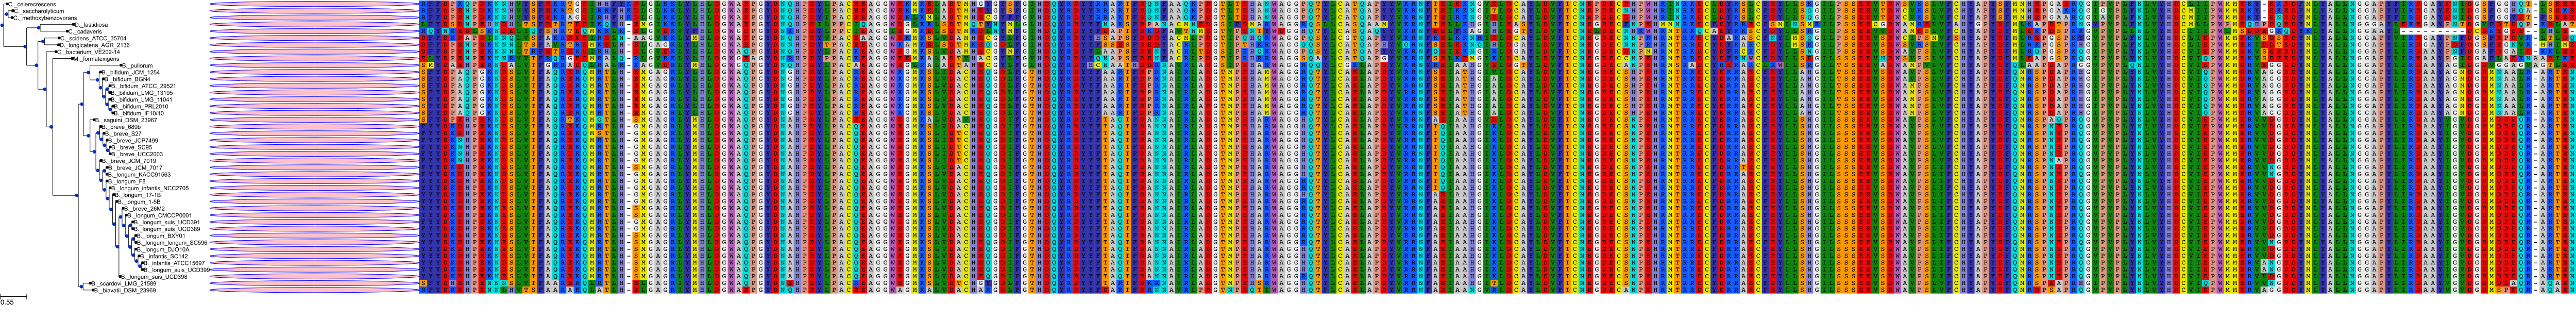

In [80]:
import sys
import ete2

t = ete2.PhyloTree('Blon_1479.nwk', alignment='Domain.aln')

for leaf in t.iter_leaves() :
    # seq.start, seq.end, shape, width, height, fgcolor, bgcolor
    motif = [0, 400, "o", None, 10, "blue", "pink", None]
    seqFace = SeqMotifFace( seq=leaf.sequence, motifs=[motif], scale_factor=1 )
    leaf.add_face(seqFace, 0, position='aligned' )

t.render('%%inline', w=5000)


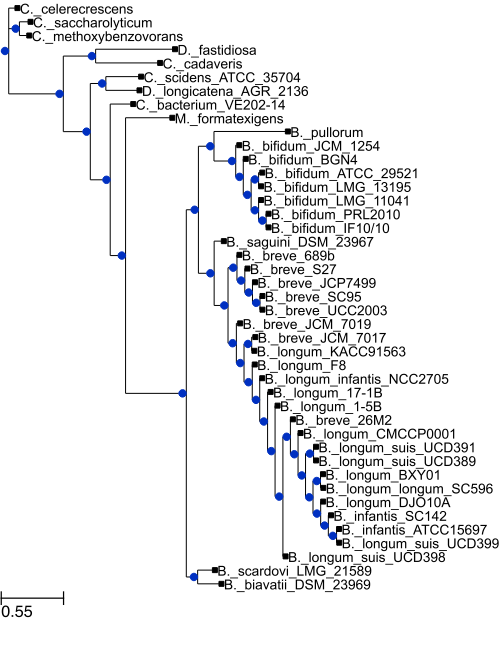

In [90]:
import sys
import ete2

t = ete2.PhyloTree('Blon_1479.nwk')

for leaf in t.iter_leaves() :
    # seq.start, seq.end, shape, width, height, fgcolor, bgcolor
    motif = [0, 400, "o", None, 10, "blue", "pink", None]
    seqFace = SeqMotifFace( seq=leaf.sequence, motifs=[motif], scale_factor=1 )
    leaf.add_face(seqFace, 0, position='aligned' )

t.render ('%%inline', w = 500)


    

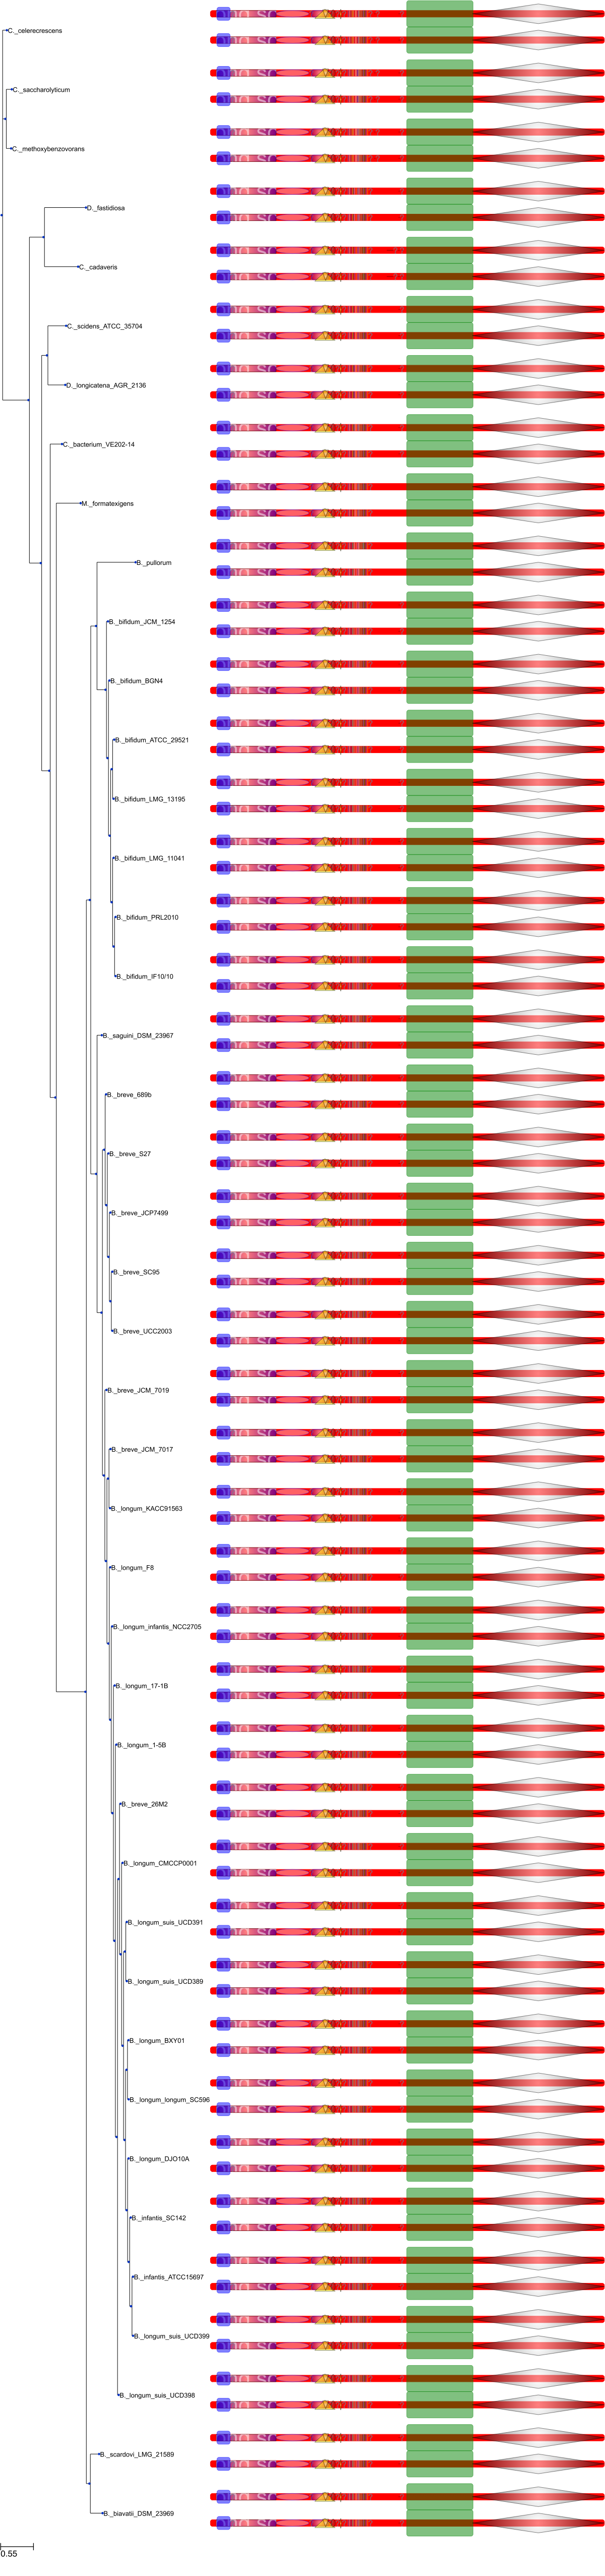

In [70]:
import sys

from ete2 import Tree, SeqMotifFace, TreeStyle, add_face_to_node

motifs = [
    # seq.start, seq.end, shape, width, height, fgcolor, bgcolor
    [10, 100, "[]", None, 10, "black", "rgradient:blue", "arial|8|white|domain Name very long so it should be clipped"],
    [101, 150, "o", None, 10, "blue", "pink", None],
    [155, 180, "()", None, 10, "blue", "rgradient:purple", None],
    [160, 190, "^", None, 14, "black", "yellow", None],
    [172, 180, "v", None, 12, "black", "rgradient:orange", None],
    [185, 190, "o", None, 12, "black", "brown", None],
    [198, 200, "<>", None, 15, "black", "rgradient:gold", None],
    [210, 240, "compactseq", 2, 10, None, None, None],
    [300, 320, "seq", 10, 10, None, None, None],
    [310, 420, "<>", None, 30, "black", "rgradient:black", None],
    [1, 420, "()", None, 10, "red", "red", None],
    [11, 30, "()", None, 20, "blue", "blue", None],
    [300, 310, "()", None, 40, "green", "green", None],
    ]

def layout(node):
    if node.is_leaf():
        seqFace = SeqMotifFace( node.sequence, motifs, scale_factor=1)
        add_face_to_node(seqFace, node, 0, position="aligned")
       


t = ete2.PhyloTree('Blon_1479.nwk', alignment='Domain.aln')
for l in t.iter_leaves():
    seq_motifs = [list(m) for m in motifs] #sample(motifs, randint(2, len(motifs))) 
    seqFace = SeqMotifFace( l.sequence, 
                            seq_motifs, 
                            intermotif_format="line",
                            seqtail_format="compactseq", 
                            scale_factor=1)
    seqFace.margin_bottom = 10
    f = l.add_face(seqFace, 0, "aligned")

ts = TreeStyle()
ts.layout_fn = layout

t.render("%%inline", w=1200, dpi=300, tree_style=ts)
#t.show(tree_style=ts)

In [63]:
type(l)

NameError: name 'l' is not defined

In [ ]:
TreeStyle()layout_fn